In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import random
import time
import argparse
from bs4 import BeautifulSoup

## Scraping the first page

In [16]:

r = requests.get('https://boardgamegeek.com/browse/boardgame/page/1')

html = r.text
soup = BeautifulSoup(html, 'html.parser')

In [55]:
#print(soup.body.prettify())

In [54]:
rows = soup.body.find_all('tr', attrs={'id':'row_'})


In [101]:
ranks = [row.find('td', attrs={'class':'collection_rank'}).get_text().strip() for row in rows]
no_ratings = [row.find_all('td', attrs={'class':'collection_bggrating'})[2].get_text().strip() for row in rows]
names = [row.find('a', attrs={'class':'primary'}).get_text() for row in rows]
links = [row.find('a', attrs={'class':'primary'}).get('href') for row in rows]
ids = [int(row.find('a', attrs={'class':'primary'}).get('href').split('/')[2]) for row in rows]

In [104]:
df = pd.DataFrame({
    'rank':ranks,
    'name':names,
    'id':ids,
    'links':links,
    'number_of_ratings':no_ratings
})

In [105]:
df

,rank,name,id,links,number_of_ratings
0,1,Gloomhaven,174430,/boardgame/174430/gloomhaven,44335
1,2,Pandemic Legacy: Season 1,161936,/boardgame/161936/pandemic-legacy-season-1,42998
2,3,Brass: Birmingham,224517,/boardgame/224517/brass-birmingham,21602
3,4,Terraforming Mars,167791,/boardgame/167791/terraforming-mars,68378
4,5,Twilight Imperium: Fourth Edition,233078,/boardgame/233078/twilight-imperium-fourth-edi...,14376
...,...,...,...,...,...
95,96,Lorenzo il Magnifico,203993,/boardgame/203993/lorenzo-il-magnifico,9762
96,97,Codenames,178900,/boardgame/178900/codenames,70110
97,98,The Isle of Cats,281259,/boardgame/281259/isle-cats,8320
98,99,Roll for the Galaxy,132531,/boardgame/132531/roll-galaxy,27126


## automated scraping

In [124]:
pages = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
boardgames = pd.DataFrame()
for page in pages:
    url = f'https://boardgamegeek.com/browse/boardgame/page/{page}?sort=numvoters&sortdir=desc'
    #url = f'https://boardgamegeek.com/browse/boardgame/page/{page}'
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html, 'html.parser')
    
    rows = soup.body.find_all('tr', attrs={'id':'row_'})
    ranks = [row.find('td', attrs={'class':'collection_rank'}).get_text().strip() for row in rows]
    no_ratings = [int(row.find_all('td', attrs={'class':'collection_bggrating'})[2].get_text().strip()) for row in rows]
    names = [row.find('a', attrs={'class':'primary'}).get_text() for row in rows]
    links = [row.find('a', attrs={'class':'primary'}).get('href') for row in rows]
    ids = [int(row.find('a', attrs={'class':'primary'}).get('href').split('/')[2]) for row in rows]
    
    df = pd.DataFrame({
        'rank':ranks,
        'name':names,
        'id':ids,
        'links':links,
        'number_of_ratings':no_ratings
    })
    
    boardgames = boardgames.append(df, ignore_index=True)
    

In [264]:
boardgames.set_index('id', inplace=True)
boardgames

,rank,name,links,number_of_ratings
id,,,,
30549,104,Pandemic,/boardgame/30549/pandemic,104891
822,184,Carcassonne,/boardgame/822/carcassonne,104530
13,408,Catan,/boardgame/13/catan,103960
68448,71,7 Wonders,/boardgame/68448/7-wonders,86475
36218,101,Dominion,/boardgame/36218/dominion,79469
...,...,...,...,...
187617,259,Nemo's War (Second Edition),/boardgame/187617/nemos-war-second-edition,3684
34084,962,Witch's Brew,/boardgame/34084/witchs-brew,3672
238992,839,Call to Adventure,/boardgame/238992/call-adventure,3671


In [268]:
boardgames.to_csv('../data/boardgames.csv', index_label='id')

In [269]:
boardgames['number_of_ratings'].min()

3666

In [126]:
boardgames['number_of_ratings'].sum()

11622136

<AxesSubplot:>

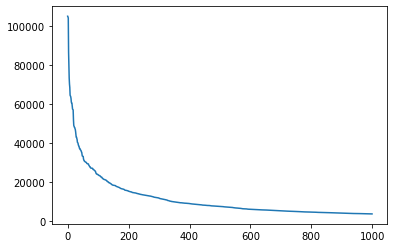

In [152]:
boardgames['number_of_ratings'].plot()

<AxesSubplot:>

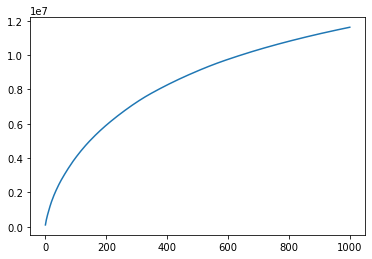

In [163]:
boardgames['number_of_ratings'].cumsum().plot()

In [258]:
boardgames['number_of_ratings'].cumsum()

0        104891
1        209421
2        313381
3        399856
4        479325
         ...   
995    11607457
996    11611129
997    11614800
998    11618470
999    11622136
Name: number_of_ratings, Length: 1000, dtype: int64

In [254]:
y = boardgames['number_of_ratings'].cumsum()
x = list(range(1,1001))

coeff = np.polyfit(np.log(x),y,1)
print(coeff)
f = np.poly1d(coeff)

[ 2725628.64691665 -7806102.01553049]


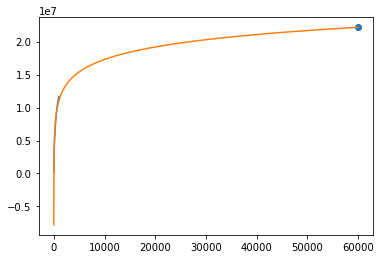

In [259]:
plt.plot(x,y)
plt.plot(range(1,60000), f(np.log(range(1,60000))))
plt.scatter(60000, f(np.log(60000)))

In [260]:
f(np.log(60000))

22181536.487892907

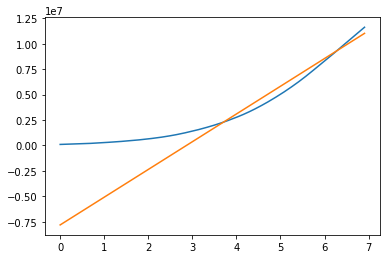

In [256]:
plt.plot(np.log(x),y)
plt.plot(np.log(x),f(np.log(x)))

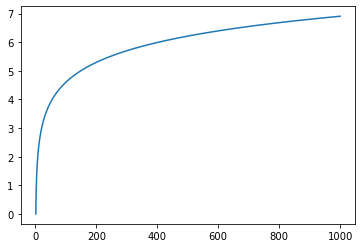

In [247]:
x1 = list(range(1,1001))
y1 = np.log(x1)
#y2 = np.exp(x1)

plt.plot(x1,y1)
#plt.plot(x1,y2)

In [115]:
#boardgames.to_csv('../data/boardgames.csv', index=False)

In [153]:
boardgames.memory_usage()

Index                 128
rank                 8000
name                 8000
id                   8000
links                8000
number_of_ratings    8000
dtype: int64